In [1]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Arsenic Prediction/water quality.csv')

Mounted at /content/drive


In [ ]:
# #load the csv file into a dataframe

#dataset=pd.read_csv("water quality.csv",encoding='unicode_escape')

In [3]:
dataset.head()

,Sample ID#,Latitude,Longitude,pH,EC,TDS,HCO3,PO4,Cl2,SO4,NO3,As,Fe,Mn,Na,K,Ca,Mg
0,1,24.606,88.249,6.90,2000,770,400.32,1.22,12.34,1.13,0.10,25,0.38,0.38,68.23,3.13,195.59,151.69
1,2,24.601,88.250,7.46,885,250,450.36,0.71,11.09,0.12,0.07,20,0.29,0.79,40.14,2.00,83.37,51.54
2,3,24.604,88.242,7.95,890,210,350.28,1.08,14.11,0.07,0.04,50,0.44,0.74,32.79,2.87,41.68,51.54
3,4,24.601,88.248,7.02,828,250,500.40,0.92,13.94,0.11,0.06,10,0.52,0.52,22.38,1.91,80.16,35.98
4,5,24.601,88.249,7.35,905,240,350.28,0.52,12.74,0.76,0.61,23,0.01,0.01,33.22,2.15,101.00,33.06


In [4]:
#Step 1: Define a Threshold and Convert to Binary Labels
threshold = 10  # Adjust the threshold based on your data
binary_labels = np.where(dataset['As'] > threshold, 1, 0)
dataset['As_binary'] = binary_labels

dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Arsenic Prediction/water quality_modified.csv', index=False)

In [5]:
dataset

,Sample ID#,Latitude,Longitude,pH,EC,TDS,HCO3,PO4,Cl2,SO4,NO3,As,Fe,Mn,Na,K,Ca,Mg,As_binary
0,1,24.606,88.249,6.90,2000,770,400.32,1.22,12.34,1.13,0.10,25,0.38,0.38,68.23,3.13,195.59,151.69,1
1,2,24.601,88.250,7.46,885,250,450.36,0.71,11.09,0.12,0.07,20,0.29,0.79,40.14,2.00,83.37,51.54,1
2,3,24.604,88.242,7.95,890,210,350.28,1.08,14.11,0.07,0.04,50,0.44,0.74,32.79,2.87,41.68,51.54,1
3,4,24.601,88.248,7.02,828,250,500.40,0.92,13.94,0.11,0.06,10,0.52,0.52,22.38,1.91,80.16,35.98,0
4,5,24.601,88.249,7.35,905,240,350.28,0.52,12.74,0.76,0.61,23,0.01,0.01,33.22,2.15,101.00,33.06,1
5,6,24.602,88.252,7.05,1043,320,500.40,0.86,13.29,0.18,0.13,27,0.24,0.80,40.00,2.21,128.26,24.31,1
6,7,24.598,88.256,7.44,642,200,350.28,0.74,14.04,0.22,0.94,18,0.43,0.43,31.53,1.66,107.41,23.34,1
7,8,24.607,88.245,7.49,366,120,250.20,0.41,14.93,0.65,0.57,26,0.34,0.34,37.50,1.82,67.33,11.67,1
8,9,24.612,88.257,6.98,1270,380,550.44,1.80,14.73,0.34,0.27,40,0.32,0.32,35.56,1.25,166.73,37.92,1
9,10,24.610,88.246,6.99,1015,250,450.36,0.55,13.98,0.72,0.60,27,0.11,0.81,37.10,1.28,81.76,34.03,1


In [6]:
x=dataset.drop(["As_binary","Sample ID#" , "Latitude" , "Longitude" , "As"],axis=1)
y=dataset["As_binary"]

x

,pH,EC,TDS,HCO3,PO4,Cl2,SO4,NO3,Fe,Mn,Na,K,Ca,Mg
0,6.90,2000,770,400.32,1.22,12.34,1.13,0.10,0.38,0.38,68.23,3.13,195.59,151.69
1,7.46,885,250,450.36,0.71,11.09,0.12,0.07,0.29,0.79,40.14,2.00,83.37,51.54
2,7.95,890,210,350.28,1.08,14.11,0.07,0.04,0.44,0.74,32.79,2.87,41.68,51.54
3,7.02,828,250,500.40,0.92,13.94,0.11,0.06,0.52,0.52,22.38,1.91,80.16,35.98
4,7.35,905,240,350.28,0.52,12.74,0.76,0.61,0.01,0.01,33.22,2.15,101.00,33.06
5,7.05,1043,320,500.40,0.86,13.29,0.18,0.13,0.24,0.80,40.00,2.21,128.26,24.31
6,7.44,642,200,350.28,0.74,14.04,0.22,0.94,0.43,0.43,31.53,1.66,107.41,23.34
7,7.49,366,120,250.20,0.41,14.93,0.65,0.57,0.34,0.34,37.50,1.82,67.33,11.67
8,6.98,1270,380,550.44,1.80,14.73,0.34,0.27,0.32,0.32,35.56,1.25,166.73,37.92
9,6.99,1015,250,450.36,0.55,13.98,0.72,0.60,0.11,0.81,37.10,1.28,81.76,34.03


# **Statistics info**

In [7]:

# Print statistics for the independent features
for column in x.columns:
    print(f"\nStatistics for {column}:")
    print(f"Mean: {x[column].mean()}")
    print(f"Mode: {x[column].mode().values[0]}")  # Mode can have multiple values, so taking the first one
    print(f"Median: {x[column].median()}")
    print(f"Standard Deviation: {x[column].std()}")
    print(f"Skewness: {x[column].skew()}")



Statistics for   pH:
Mean: 7.494
Mode: 6.9
Median: 7.475
Standard Deviation: 0.39066344983179935
Skewness: 0.0911868102032183

Statistics for EC:
Mean: 903.2666666666667
Mode: 995
Median: 856.5
Standard Deviation: 381.5062645423499
Skewness: 1.4742412484654708

Statistics for TDS:
Mean: 272.3333333333333
Mode: 250
Median: 245.0
Standard Deviation: 145.83134645608743
Skewness: 2.456548655286224

Statistics for HCO3:
Mean: 393.648
Mode: 450.36
Median: 400.32
Standard Deviation: 90.79128890311921
Skewness: -0.2334597689281686

Statistics for PO4:
Mean: 0.6623333333333332
Mode: 0.32
Median: 0.5900000000000001
Standard Deviation: 0.3582782903461126
Skewness: 1.359468043775099

Statistics for Cl2:
Mean: 14.004333333333333
Mode: 11.9
Median: 14.075
Standard Deviation: 1.491871500737461
Skewness: -0.428990973639237

Statistics for SO4:
Mean: 0.37399999999999994
Mode: 0.12
Median: 0.20500000000000002
Standard Deviation: 0.30503363296754565
Skewness: 0.8893549761575533

Statistics for NO3:
Mean

In [113]:
#step 2: Split the Dataset
# xtrain,xtest,ytrain,ytest=train_test_split(dataset.drop(["As_binary","Sample ID#" , "Latitude" , "Longitude" , "As"],axis=1),binary_labels,test_size=.30,random_state=0)
# print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets with shuffling
xtrain, xtest, ytrain, ytest = train_test_split(dataset.drop(["As_binary", "Sample ID#", "Latitude", "Longitude", "As"], axis=1),
                                                binary_labels,
                                                test_size=0.30,
                                                random_state=1,
                                                shuffle=True)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)


(21, 14) (9, 14) (21,) (9,)


In [114]:
ytest


array([1, 1, 1, 1, 1, 1, 1, 0, 1])

In [115]:
# Step 3:standard scaling
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)



In [116]:
print(xtrain)

[[ 1.42670308 -1.15575258 -0.84964717  0.0729325  -0.63059725  0.62659072
   1.24839747  1.26365658 -0.09805807 -0.49509192 -0.30199264 -0.17112055
  -0.88609358 -0.55279999]
 [ 0.82459768 -0.88125436 -0.66941899 -0.94812244 -0.52632526 -0.0207541
   0.6226304   0.64397883  2.48793841  1.51721717 -0.52279967  0.01604255
  -0.88609358 -0.831115  ]
 [-0.3555289  -0.04602901 -0.24888655 -0.43759497 -0.50025727 -0.68732699
   1.08372193  0.97204352 -1.53472278 -1.61304141 -0.75565072  0.78341126
   0.0713371  -0.02521432]
 [ 1.08952405 -0.08122108 -0.42911473 -0.43759497  0.95955054  0.1907546
  -1.18880061 -1.1056995   0.52449664  1.10730235 -0.81319437  2.13098557
  -1.46906941  0.56460923]
 [ 1.06543984 -0.27829673 -0.24888655  1.09398744 -0.39598528 -1.22571278
   0.55676018  0.38881741 -0.52905748 -0.90500673 -0.09858253 -1.06950342
  -0.46983066 -0.80111315]
 [-0.13877096 -0.66306347 -0.4891908  -0.43759497  0.07323866  0.14588912
  -0.69477397  2.17494738  0.47660782 -0.04791212 -0.

In [117]:
print(xtest)

[[ 0.75234503 -0.26187376 -0.18881048  0.0729325  -1.28229716  1.58158457
  -0.89238462 -1.1056995   1.242829    1.29362727 -1.12633888 -0.77004247
   0.40450324 -0.24256813]
 [-0.33144469 -0.3557193  -0.30896261 -0.43759497 -0.83914122  0.99833329
  -0.99118995 -1.06924787  1.0512737   0.39926768 -0.20965516 -1.20051759
   0.44605163 -0.36034133]
 [-0.76496057 -0.68652485 -0.54926686  0.0729325  -0.2395773  -0.01434475
   1.61068367  1.59172126 -0.09805807  1.74080706  0.20920908 -0.35828365
   0.02952903  0.00574503]
 [ 0.19840806  0.70708149  0.29179802 -0.94812244 -1.02161719  0.96628652
  -0.56303353 -0.74118318 -0.5769463  -0.86774175 -0.77304764 -1.72457427
  -0.22002098  0.06798291]
 [-0.813129    0.4583908   0.35187408  0.58345997  0.04717066  0.89578362
  -0.7935793  -0.81408645  1.242829    1.29362727  0.75921932 -0.35828365
  -0.05356774  0.81292239]
 [ 0.34291336  0.09239317  0.05149377  0.0729325  -1.02161719  0.30612299
  -1.02412506 -0.95989298  0.57238546  0.02661785 -

In [118]:
#  #Step 4: Feature Selection using L1 Regularization (Logistic Regression)
# model = LogisticRegression()
# model.fit(xtrain, ytrain)


# Logistic Regression

In [119]:
 #Step 5: Train Logistic Regression Model
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)
#pred=model1.predict(xtest)

# Make predictions
logistic_predictions = model1.predict(xtest)


In [120]:
 #Evaluate Logistic Regression Model
logistic_accuracy = accuracy_score(ytest, logistic_predictions)
logistic_precision = precision_score(ytest, logistic_predictions)
logistic_recall = recall_score(ytest, logistic_predictions)
logistic_conf_matrix = confusion_matrix(ytest, logistic_predictions)


In [121]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"Confusion Matrix:\n{logistic_conf_matrix}")


Logistic Regression Metrics:
Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 1.0
Confusion Matrix:
[[0 1]
 [0 8]]


# ROC Curve

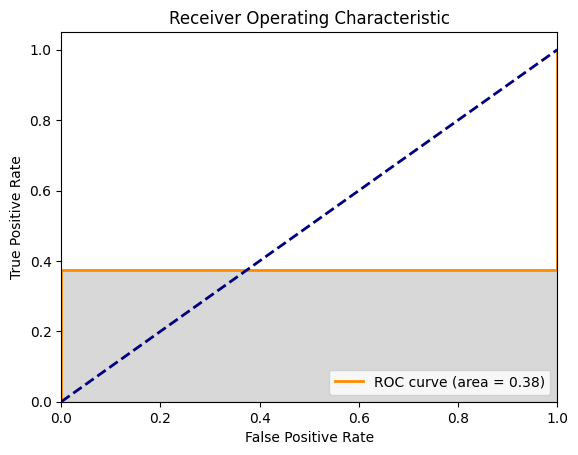

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, logistic_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Highlight AUC
plt.fill_between(fpr, tpr, color='grey', alpha=0.3)

plt.show()

# AUC


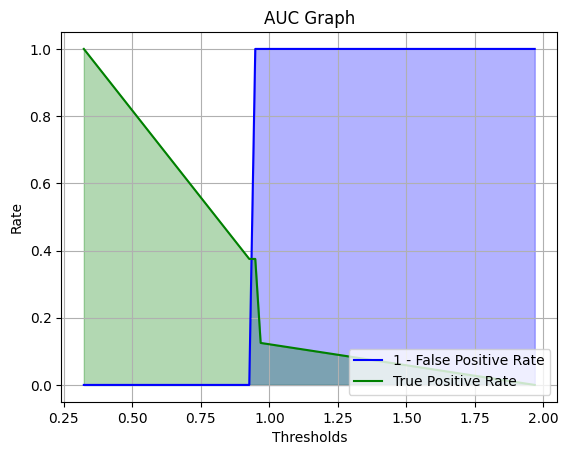

In [126]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, logistic_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot AUC graph
plt.figure()
plt.plot(thresholds, 1 - fpr, label='1 - False Positive Rate', color='blue')
plt.plot(thresholds, tpr, label='True Positive Rate', color='green')
plt.fill_between(thresholds, 1 - fpr, color='blue', alpha=0.3)
plt.fill_between(thresholds, tpr, color='green', alpha=0.3)
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.title('AUC Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


# Step 6: Train Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

# Make predictions
dt_predictions = dt_model.predict(xtest)

# Evaluate Decision Tree Model
dt_accuracy = accuracy_score(ytest, dt_predictions)
dt_precision = precision_score(ytest, dt_predictions)
dt_recall = recall_score(ytest, dt_predictions)
dt_conf_matrix = confusion_matrix(ytest, dt_predictions)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"Confusion Matrix:\n{dt_conf_matrix}")



Decision Tree Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[9]]


# KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Step 6: Train KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain, ytrain)

# Make predictions
knn_predictions = knn_model.predict(xtest)

# Evaluate KNN Model
knn_accuracy = accuracy_score(ytest, knn_predictions)
knn_precision = precision_score(ytest, knn_predictions)
knn_recall = recall_score(ytest, knn_predictions)
knn_conf_matrix = confusion_matrix(ytest, knn_predictions)

print("\nK-Nearest Neighbors Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"Confusion Matrix:\n{knn_conf_matrix}")



K-Nearest Neighbors Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[9]]


# Random Forest

In [17]:
#Step 6: Train Random Forest Model
model2 = RandomForestClassifier()
model2.fit(xtrain, ytrain)

# Make predictions
rf_predictions = model2.predict(xtest)


In [18]:
 #Evaluate Random Forest Model
rf_accuracy = accuracy_score(ytest, rf_predictions)
rf_precision = precision_score(ytest, rf_predictions)
rf_recall = recall_score(ytest, rf_predictions)
rf_conf_matrix = confusion_matrix(ytest, rf_predictions)



In [19]:
print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")



Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[9]]


# Support Vector Machine

In [20]:
#Step 6: Train support Vector Machine Model
from sklearn.svm import SVC
model3 = SVC()
model3.fit(xtrain, ytrain)

# Make predictions
SVC_predictions = model3.predict(xtest)


In [21]:
#Evaluate Random Forest Model
SVC_accuracy = accuracy_score(ytest, rf_predictions)
SVC_precision = precision_score(ytest, rf_predictions)
SVC_recall = recall_score(ytest, rf_predictions)
SVC_conf_matrix = confusion_matrix(ytest, rf_predictions)


In [22]:
print("\nSVC:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")


SVC:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[9]]


# GaussianNB


In [23]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(xtrain, ytrain)

# Make predictions
GaussianNB_predictions = model4.predict(xtest)

In [24]:
#Evaluate Random Forest Model
GaussianNB_accuracy = accuracy_score(ytest, rf_predictions)
GaussianNB_precision = precision_score(ytest, rf_predictions)
GaussianNB_recall = recall_score(ytest, rf_predictions)
GaussianNB_conf_matrix = confusion_matrix(ytest, rf_predictions)


In [25]:
print("\nGaussianNB:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")


GaussianNB:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[9]]


# Code For Map

In [26]:

# Combine actual and predicted values into a dataset
map_df = pd.DataFrame({
    'mLatitude': dataset["Latitude"].iloc[:len(xtest)],
    'mLongitude': dataset["Longitude"].iloc[:len(xtest)],
    'Actual_As': ytest,
    'Predicted_As': logistic_predictions
})

# Create a base map centered at the mean of the coordinates
map_center = [map_df["mLatitude"].mean(), map_df["mLongitude"].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster to group markers if you have many data points
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each data point with actual and predicted values
for index, row in map_df.iterrows():
    actual_color = 'green' if row['Actual_As'] == 1 else 'blue'
    predicted_color = 'red' if row['Predicted_As'] == 1 else 'yellow'

    popup_text = f"Actual: {row['Actual_As']}, Predicted: {row['Predicted_As']}"

    if row['Actual_As'] == 1 and row['Predicted_As'] == 1:
        popup_text += ' - True Positive'
    elif row['Actual_As'] == 0 and row['Predicted_As'] == 0:
        popup_text += ' - True Negative'
    elif row['Actual_As'] == 0 and row['Predicted_As'] == 1:
        popup_text += ' - False Positive'
    elif row['Actual_As'] == 1 and row['Predicted_As'] == 0:
        popup_text += ' - False Negative'

    folium.CircleMarker(
        location=[row["mLatitude"], row["mLongitude"]],
        radius=10,
        popup=popup_text,
        fill=True,
        color=actual_color,
        fill_color=actual_color,
        fill_opacity=0.7,
    ).add_to(marker_cluster)

    folium.CircleMarker(
        location=[row["mLatitude"] + 0.02, row["mLongitude"]],
        radius=8,
        popup=popup_text,
        fill=True,
        color=predicted_color,
        fill_color=predicted_color,
        fill_opacity=0.7,
    ).add_to(marker_cluster)

# Save the map to your Google Drive
output_path = '/content/drive/MyDrive/Colab Notebooks/Arsenic Prediction/classification_comparison_map.html'
mymap.save(output_path)